In [1]:
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
conn = sqlite3.connect(r'F:\datasets\sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [3]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [36]:
df.shape

(16044, 10)

In [38]:
df['return_date'].isna().sum()

183

In [55]:
df.describe(include=['object','int64','datetime64','float64'], datetime_is_numeric=True)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
count,16044,15861,16044,16044.000000,16044,16044,16044.00000,16044.000000,16044.000000,16044
unique,NaN,NaN,599,NaN,2,958,NaN,NaN,NaN,5
top,NaN,NaN,HUNT,NaN,Woodridge,BUCKET BROTHERHOOD,NaN,NaN,NaN,PG-13
freq,NaN,NaN,46,NaN,8121,34,NaN,NaN,NaN,3585
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,NaN,1.506171,NaN,NaN,4.93549,2.942630,20.215443,NaN
min,2005-05-24 22:53:30,2005-05-25 23:55:21,NaN,1.000000,NaN,NaN,3.00000,0.990000,9.990000,NaN
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,NaN,1.000000,NaN,NaN,4.00000,0.990000,14.990000,NaN
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,NaN,2.000000,NaN,NaN,5.00000,2.990000,20.990000,NaN
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,NaN,2.000000,NaN,NaN,6.00000,4.990000,25.990000,NaN
max,2006-02-14 15:16:03,2005-09-02 02:35:22,NaN,2.000000,NaN,NaN,7.00000,4.990000,29.990000,NaN


<AxesSubplot:>

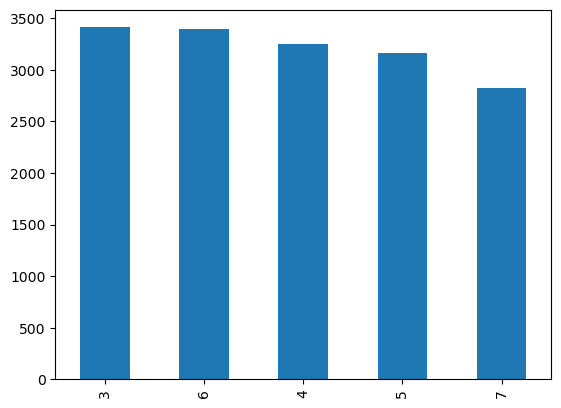

In [58]:
df['film_rental_duration'].value_counts().plot(kind='bar')

In [59]:
df['film_rental_duration'].value_counts()

3    3412
6    3392
4    3251
5    3165
7    2824
Name: film_rental_duration, dtype: int64

In [61]:
df['film_rental_rate'].value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

<AxesSubplot:>

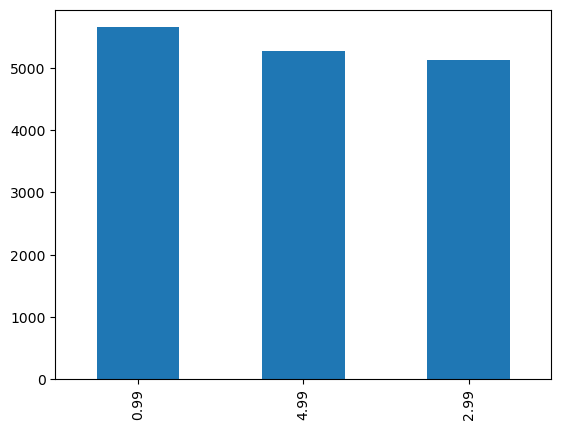

In [66]:
df['film_rental_rate'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='film_rental_rate'>

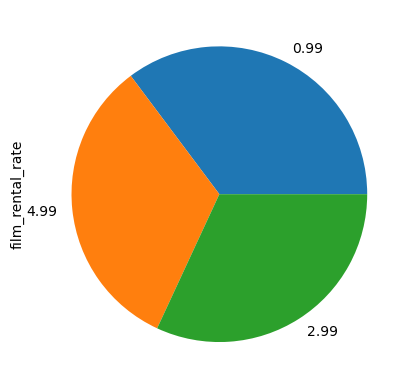

In [67]:
df['film_rental_rate'].value_counts().plot(kind='pie')

In [69]:
df['film_replacement_cost'].value_counts()

22.99    1044
27.99     958
21.99     912
29.99     868
12.99     864
20.99     863
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: film_replacement_cost, dtype: int64

<AxesSubplot:ylabel='Frequency'>

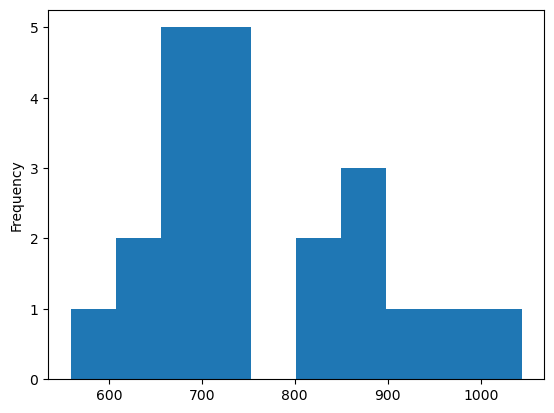

In [76]:
df['film_replacement_cost'].value_counts().plot(kind='hist')

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='film_replacement_cost', ylabel='Density'>

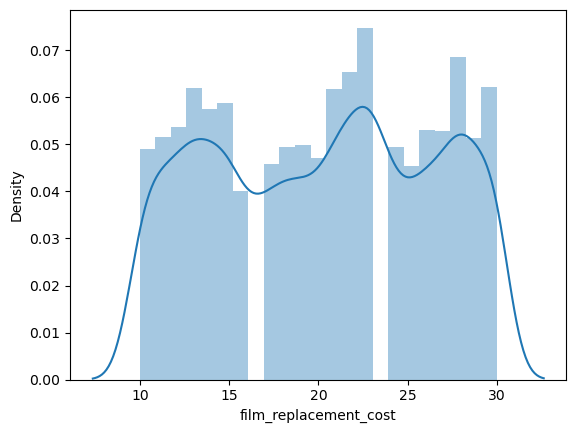

In [75]:
sns.distplot(df['film_replacement_cost'], hist=True , kde=True, vertical=False)

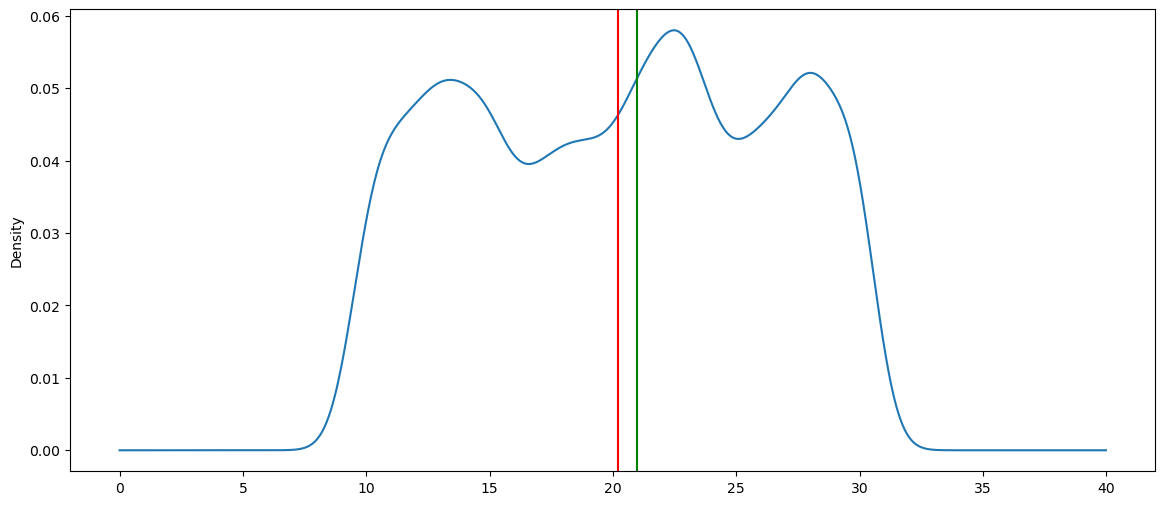

In [77]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

<AxesSubplot:>

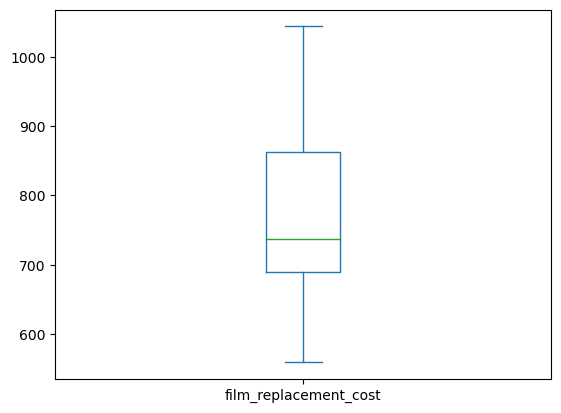

In [78]:
df['film_replacement_cost'].value_counts().plot(kind='box')

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='film_replacement_cost'>

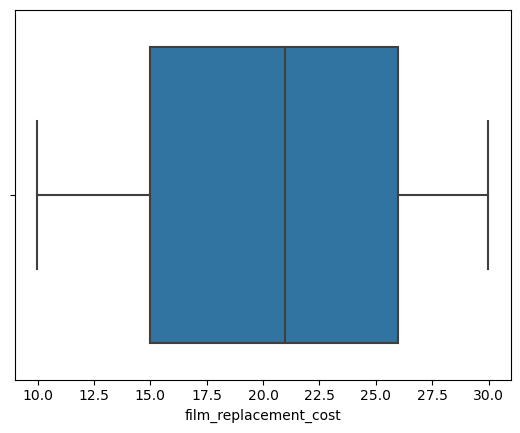

In [79]:
sns.boxplot(df['film_replacement_cost'])

In [80]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot:>

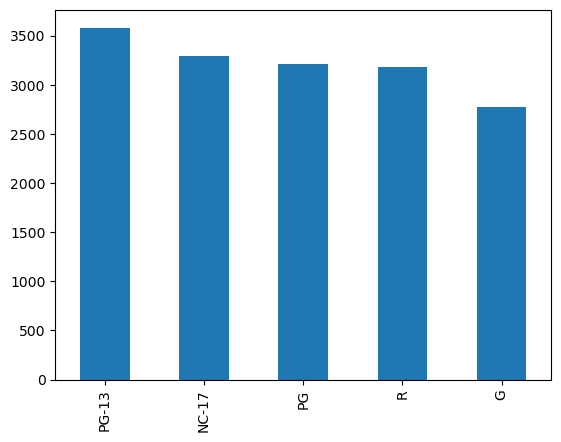

In [82]:
df['film_rating'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='film_rating'>

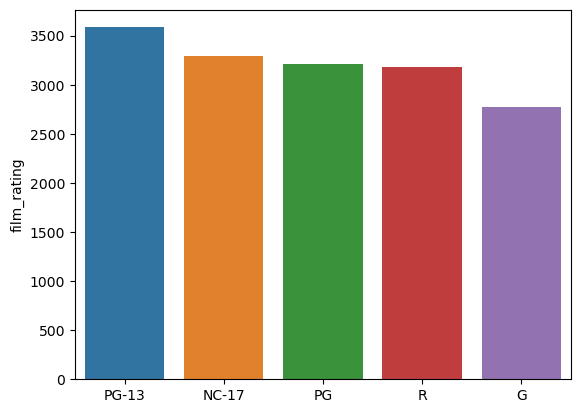

In [84]:
data1=df['film_rating'].value_counts()
sns.barplot(x=data1.index,y=data1)

<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

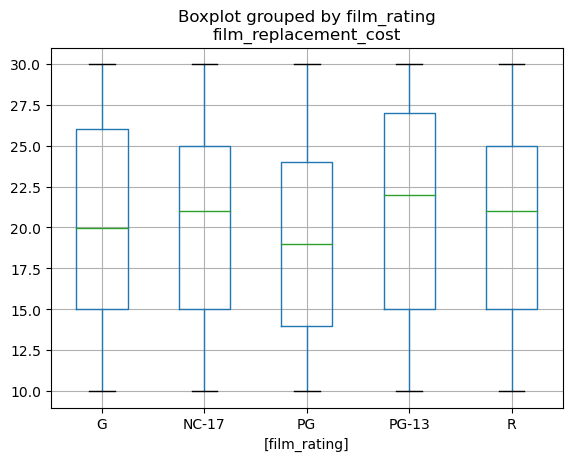

In [86]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating')

In [87]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [89]:
for col in df.columns:
    print(col)

rental_date
return_date
customer_lastname
store_id
rental_store_city
film_title
film_rental_duration
film_rental_rate
film_replacement_cost
film_rating


In [91]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

In [92]:
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

In [95]:
df['rental_days'].describe()

count    15861.000000
mean         4.525944
std          2.635108
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: rental_days, dtype: float64

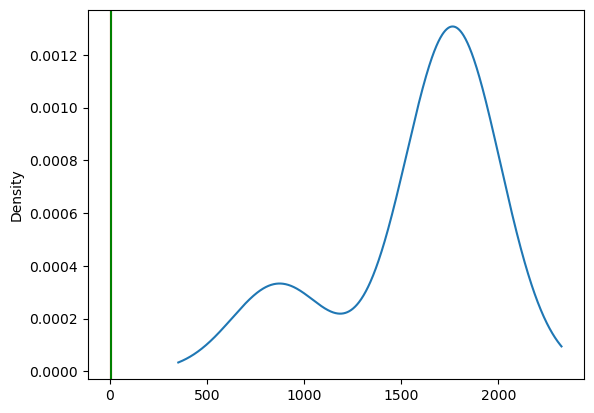

In [108]:
ax=df['rental_days'].value_counts().plot(kind='density')
ax.axvline(df['rental_days'].mean(), color='red')
ax.axvline(df['rental_days'].median(), color='green')

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


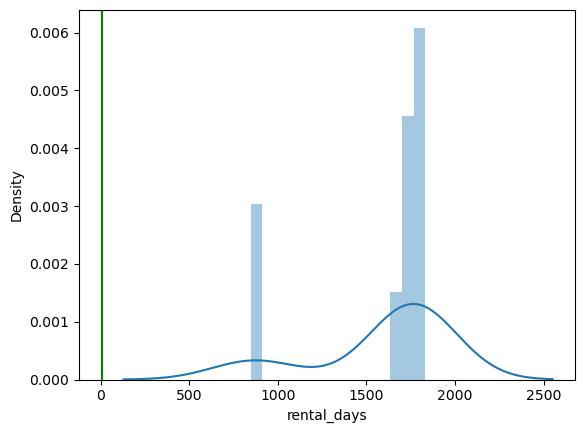

In [109]:
axx = sns.distplot(df['rental_days'].value_counts(), kde=True, hist=True, vertical=False)
axx.axvline(df['rental_days'].mean(), color='red')
axx.axvline(df['rental_days'].median(), color='green')

In [4]:
for col in df.columns:
    print(col)

rental_date
return_date
customer_lastname
store_id
rental_store_city
film_title
film_rental_duration
film_rental_rate
film_replacement_cost
film_rating


In [3]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [7]:
df['film_daily_rental_rate'].value_counts()

0.330000    1447
0.998000    1262
0.165000    1230
0.247500    1177
0.498333    1141
1.247500    1095
0.427143    1052
0.831667    1021
1.663333    1018
0.598000    1001
0.747500     979
0.996667     947
0.198000     902
0.141429     896
0.712857     876
Name: film_daily_rental_rate, dtype: int64

<AxesSubplot:ylabel='Density'>

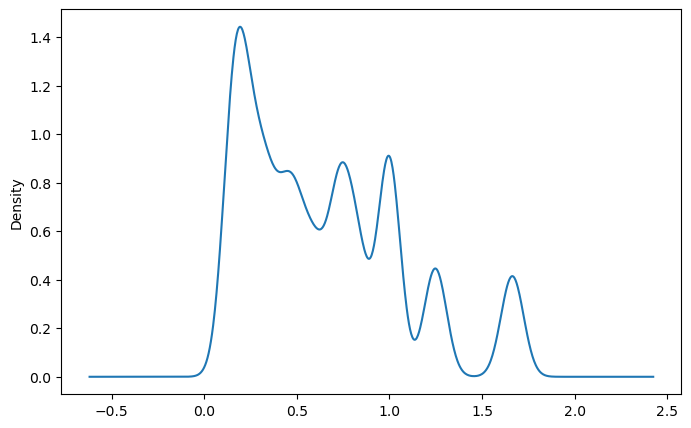

In [8]:
df['film_daily_rental_rate'].plot(kind='kde', figsize=(8,5))

In [18]:
data1 = df['film_daily_rental_rate']

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


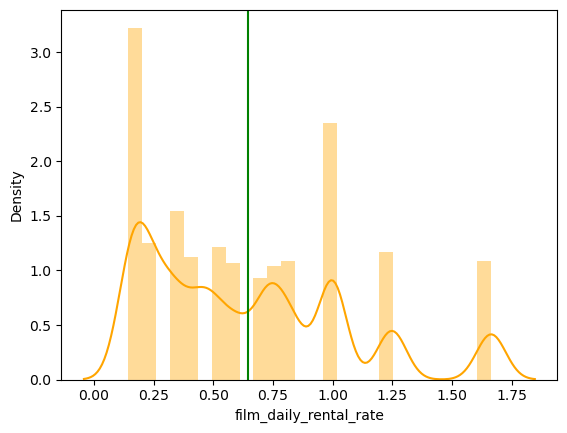

In [21]:
ax = sns.distplot(df['film_daily_rental_rate'], kde=True, hist=True, vertical=False, color='orange')
ax.axvline(df['film_daily_rental_rate'].mean(), color='green')

<AxesSubplot:xlabel='film_daily_rental_rate', ylabel='Density'>

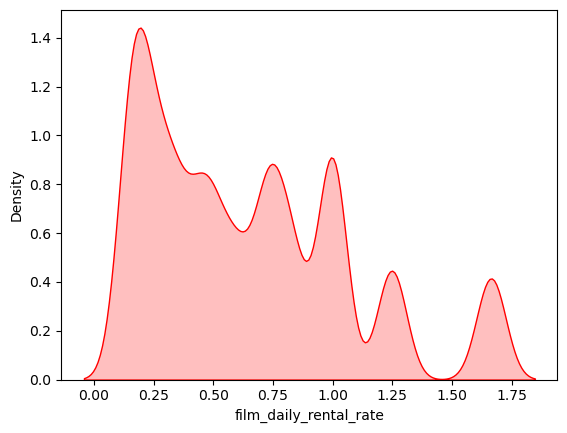

In [19]:
sns.kdeplot(data=data1, color='red', shade=True)

In [6]:
df['film_daily_rental_rate'].value_counts()

0.330000    1447
0.998000    1262
0.165000    1230
0.247500    1177
0.498333    1141
1.247500    1095
0.427143    1052
0.831667    1021
1.663333    1018
0.598000    1001
0.747500     979
0.996667     947
0.198000     902
0.141429     896
0.712857     876
Name: film_daily_rental_rate, dtype: int64

In [11]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,film_daily_rental_rate
rental_id,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,0.141429


In [6]:
df['film_daily_rental_rate'].min()

0.14142857142857143

In [7]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,film_daily_rental_rate
rental_id,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,1.663333


In [8]:
for col in df.columns:
    print(col)

rental_date
return_date
customer_lastname
store_id
rental_store_city
film_title
film_rental_duration
film_rental_rate
film_replacement_cost
film_rating
film_daily_rental_rate


In [9]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

In [11]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

In [12]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rental_rate'].value_counts()

0.99    2754
4.99    2664
2.99    2505
Name: film_rental_rate, dtype: int64

In [14]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

In [18]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

8444